## Data and Programming Documentation
### Univ. of Georiga Terry College of Business, PhD Candidate Rachel Ramey Doctoral Research
#### This stage of data managment conducted by Zoe Zirlin, Master of Marketing Research Candidate

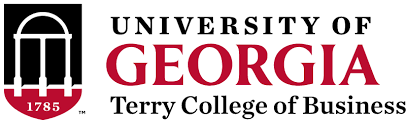

50 CSV files were downloaded, re-organized and concatenated into 2 dataframes for research regarding Opioid deaths across the United States.

Original raw data that includes each state's transactin data is over 75GB, meaning that each state needed to be downloaded, re-organized and concatenated.

If you want to view the Python script that creates the final dataframes, please review the accompanying Github repository.

Github repository: https://github.com/zoezirlin/Opioid_Ramey_PhD_UGA

Python script: https://github.com/zoezirlin/Opioid_Ramey_PhD_UGA/blob/master/code_10.29.2020.py

Questions regading the project objectives and use of this data can be sent to rachel.ramey@uga.edu.

Question regarding this programming can be sent to zoe.zirlin@uga.edu.

### How to download, reconfigure, export data into new CSV file for a specific state (Example: Alabama)

#### Step 1: Download the raw CSV file from Washington Post onto computer

1(A). Go to https://www.washingtonpost.com/graphics/2019/investigations/dea-pain-pill-database/.
    
1(B). Scroll down to the interactive "Find the data for where you live"

1(C). Select the state of you choice (Alabama is used for this example)

1(D). Select "State Wide" for the second box choice.

1(E). Click on red button "Download raw data for Alabama (or state of your choice)"

Note: If the file downloads as a GZ file, just unzip (double click on mac/ right click and unzip on hp) and you should have the CSV!

#### Step 2: Copy and paste state's code chunk from full Python script at https://github.com/zoezirlin/Opioid_Ramey_PhD_UGA/blob/master/code_10.29.2020.py

2(A). Go to link above, command-F for state's abbreviation ("AL" for Alabama or "IL" for Illinois)

2(B). Select, copy and paste that code into new python script

2(C). Look in the first line, which reads --- alabama_full = pd.read_csv(r'C:\Users\zlz20764\Desktop\op\arcos-al-statewide-itemized.csv')

Replace the "C:\Users\zlz20764\Desktop\op\arcos-al-statewide-itemized.csv" with pathname of the raw Alabama CSV you just downloaded onto your computer. 

For information about pathnames, go to https://www.timeatlas.com/copy-file-path/

2(D). Above the code that you just pasted into the python script, write:

import pandas as pd

import numpy as np

2(E). Import the FIPS CODES excel file to be used for data identification purposes, file can be found at https://github.com/zoezirlin/Opioid_Ramey_PhD_UGA/blob/master/US_FIPS_Codes.xls.

2(F). At line 17, which reads --- fip = pd.read_excel(r'C:\Users\zlz20764\Desktop\op\US_FIPS_Codes.xls', converters={'FIPS County': lambda x: str(x)})

Replace the "C:\Users\zlz20764\Desktop\op\US_FIPS_Codes.xls" with pathname of the FIPS CODES excel file that you just donwloaded onto your computer.

In [3]:
import pandas as pd
import numpy as np

alabama_full = pd.read_csv(r'/Users/zoezirlin/Desktop/arcos-al-statewide-itemized.csv')
variables_full_head = alabama_full.head()
alabama = alabama_full.copy()
alabama = alabama[['BUYER_STATE','BUYER_COUNTY','Combined_Labeler_Name','TRANSACTION_DATE','DOSAGE_UNIT','MME','dos_str']]
alabama['Volume'] = alabama['DOSAGE_UNIT']*alabama['dos_str']
alabama['col'] = alabama['TRANSACTION_DATE'].astype(str)
alabama['YEAR'] = alabama['col'].str[-4:]
alabama['DAY_MONTH'] = alabama['col'].str[:-4]
alabama['DAY'] = alabama['DAY_MONTH'].str[-2:]
alabama['MONTH'] = alabama['DAY_MONTH'].str[:-2]
alabama.drop('col', axis=1, inplace=True)
alabama.drop('DAY_MONTH', axis=1, inplace=True)
alabama.drop('TRANSACTION_DATE', axis=1, inplace=True)
alabama['M_X'] = ('m' + alabama['MONTH'])
alabama['MONTH_YEAR'] = alabama['YEAR'] + alabama['M_X']
alabama['PURDUE_VS_INDUSTRY'] = np.where(alabama['Combined_Labeler_Name'] == 'Purdue Pharma LP', 'Purdue', 'Industry')
fip = pd.read_excel(r'/Users/zoezirlin/Desktop/US_FIPS_Codes.xls', converters={'FIPS County': lambda x: str(x)})
fip['FIP_CODE'] = fip['STATE_AB'] + fip['FIPS County']
fip['County Name'] = fip['County Name'].str.upper()
fip.drop('FIPS State', axis=1, inplace=True)
fip.drop('State', axis=1, inplace=True)
fip.drop('FIPS County', axis=1, inplace=True)
fip = fip.rename(columns={'County Name':'BUYER_COUNTY'})
fip = fip.rename(columns={'STATE_AB':'BUYER_STATE'})
x = pd.merge(alabama, fip, on=['BUYER_COUNTY','BUYER_STATE'], how='inner')
alabama_A = pd.pivot_table(data=x, index = ['MONTH_YEAR', 'BUYER_COUNTY', 'YEAR', 'MONTH', 'BUYER_STATE', 'FIP_CODE'], values = ['MME', 'Volume', 'DOSAGE_UNIT'], columns='PURDUE_VS_INDUSTRY',aggfunc=np.sum)
alabama_B = pd.pivot_table(data=x, index = ['MONTH_YEAR', 'BUYER_COUNTY', 'YEAR', 'MONTH', 'BUYER_STATE', 'FIP_CODE'], values = ['MME', 'Volume', 'DOSAGE_UNIT'], columns='Combined_Labeler_Name',aggfunc=np.sum)
data1_A = pd.DataFrame(alabama_A.to_records())
data1_B = pd.DataFrame(alabama_B.to_records())
data1_A.fillna(0)
data1_B.fillna(0)
for col in data1_A.columns: 
    print(col)
data1_A.columns =['Month_Year', 
                                        'County',
                                        'Year',
                                        'Month',
                                        'State',
                                        'FIPS_Code',
                                        'Dosage_Industry',
                                        'Dosage_Purdue',
                                        'MME_Industry',
                                        'MME_Purdue',
                                        'Volume_Industry',
                                        'Volume_Purdue'
                                        ]

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,5,22,25,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


MONTH_YEAR
BUYER_COUNTY
YEAR
MONTH
BUYER_STATE
FIP_CODE
('DOSAGE_UNIT', 'Industry')
('DOSAGE_UNIT', 'Purdue')
('MME', 'Industry')
('MME', 'Purdue')
('Volume', 'Industry')
('Volume', 'Purdue')


2(G). Run the code, the five ten observations of the two dataframes you have created should look this this:

In [4]:
data1_A.head()

,Month_Year,County,Year,Month,State,FIPS_Code,Dosage_Industry,Dosage_Purdue,MME_Industry,MME_Purdue,Volume_Industry,Volume_Purdue
0,2006m1,AUTAUGA,2006,1,AL,AL001,163860.0,1600.0,1.134002e+06,96822.00,1430550.0,72000.0
1,2006m1,BALDWIN,2006,1,AL,AL003,443050.0,9700.0,3.088214e+06,587655.75,4007595.0,437000.0
2,2006m1,BARBOUR,2006,1,AL,AL005,65090.0,400.0,4.460741e+05,16137.00,574675.0,12000.0
3,2006m1,BIBB,2006,1,AL,AL007,53720.0,1800.0,3.894289e+05,88753.50,497650.0,66000.0
4,2006m1,BLOUNT,2006,1,AL,AL009,86530.0,2500.0,6.280274e+05,123717.00,789575.0,92000.0


In [5]:
data1_B.head()

,MONTH_YEAR,BUYER_COUNTY,YEAR,MONTH,BUYER_STATE,FIP_CODE,"('DOSAGE_UNIT', 'A-S Medication Solutions')","('DOSAGE_UNIT', 'AAI Pharma')","('DOSAGE_UNIT', 'AbbVie Inc.')","('DOSAGE_UNIT', 'Actavis Pharma, Inc.')",...,"('Volume', 'UCB, Inc.')","('Volume', 'Unit Dose Services')","('Volume', 'Victory Pharma, Inc.')","('Volume', 'Vindex Pharmaceuticals, Inc.')","('Volume', 'VistaPharm Inc.')","('Volume', 'Watson Pharma, Inc.')","('Volume', 'West-Ward Pharmaceuticals Corp.')","('Volume', 'WraSer Pharmaceuticals')","('Volume', 'Xanodyne Pharmaceuticals, Inc.')","('Volume', 'Zydus Pharmaceuticals (USA) Inc.')"
0,2006m1,AUTAUGA,2006,1,AL,AL001,NaN,NaN,100.0,23360.0,...,17750.0,NaN,NaN,NaN,NaN,NaN,2500.0,NaN,NaN,NaN
1,2006m1,BALDWIN,2006,1,AL,AL003,NaN,300.0,700.0,84200.0,...,179750.0,NaN,NaN,NaN,NaN,NaN,3000.0,NaN,NaN,NaN
2,2006m1,BARBOUR,2006,1,AL,AL005,NaN,300.0,500.0,12100.0,...,3000.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN
3,2006m1,BIBB,2006,1,AL,AL007,NaN,NaN,NaN,3300.0,...,26000.0,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN
4,2006m1,BLOUNT,2006,1,AL,AL009,NaN,100.0,200.0,5900.0,...,61250.0,NaN,NaN,NaN,NaN,NaN,6500.0,NaN,NaN,NaN


#### Step 3: Download the results into CSV files on your computer

3(A). Create two blank CSV files on your computer, title them something like "ALABAMA_DATA_1" for the first dataframe, and "ALABAMA_DATA_2" for the second dataframe.

3(B). Gather pathnames for the two blank CSV files you just created. (Command+C to copy)

3(C). Paste the pathnames into the following code below:

In [6]:
data1_A.to_csv(r'THIS_IS_WHERE_YOUR_PATHNAME_GOES!', index = False)
data1_B.to_csv(r'THIS_IS_WHERE_YOUR_PATHNAME_GOES!', index = False)

### Congratulations! The empty CSV files that you created should be autopopulated with the dataframes that you just programmed in your Python script.